http://mlbootcamp.ru/round/12/sandbox/

In [488]:
import math
import datetime
from functools import wraps
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [489]:
data_train = pd.read_csv('data/train.csv', sep=';', index_col='id')
data_test = pd.read_csv('data/test.csv', sep=';', index_col='id')
data_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
5,18888,1,154,85.0,130,80,1,1,0,0,1
6,19042,2,170,69.0,130,90,1,1,None,0,1
7,20432,1,160,70.0,120,75,1,1,0,0,0
10,18133,2,185,94.0,130,90,1,1,None,0,1
11,16093,2,170,76.0,120,80,1,1,0,0,1


In [409]:
data_train.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [410]:
data_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [411]:
data_test.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,19455.528400,1.353733,164.322267,74.120615,130.271300,95.689000,1.368033,1.222700
std,2477.840922,0.478136,8.213740,14.341540,212.501152,163.852598,0.679166,0.566494
min,8865.000000,1.000000,50.000000,10.000000,-130.000000,-90.000000,1.000000,1.000000
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000
50%,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000
75%,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000
max,23705.000000,2.000000,198.000000,183.000000,16020.000000,9100.000000,3.000000,3.000000


### Process incorrect ap

In [490]:
# ap

def fix_incorrect_ap(data, column):
    max_ap = 300
    min_ap = 30
    
    print 'Before: shape:', data.shape
    
    # flip sign if ap < 0
    neg = data[column] < 0
    if len(np.nonzero(neg)[0]) > 0:
        print '\n{} < 0:'.format(column)
        print data.ix[neg, ['ap_hi', 'ap_lo', 'cardio']]
        data.loc[neg, column] = -data.ix[neg, column]
        print 'Fixed {}:'.format(column)
        print data.ix[neg, ['ap_hi', 'ap_lo', 'cardio']] 
    
    # devide by 10 while ap > max_ap
    gt_max = data[column] > max_ap
    while len(np.nonzero(gt_max)[0]) > 0:
        print '\n{} > {}:'.format(column, max_ap)
        print data.ix[gt_max, ['ap_hi', 'ap_lo', 'cardio']]
        data.loc[gt_max, column] = data.ix[gt_max, column] / 10
        print 'Fixed {}:'.format(column)
        print data.ix[gt_max, ['ap_hi', 'ap_lo', 'cardio']]            
        gt_max = data[column] > max_ap

    # multiply by 10 while ap < min_ap
    lt_min = (data[column] < min_ap) & (data[column] != 0)
    while len(np.nonzero(lt_min)[0]) > 0:
        print '\n{} < {}:'.format(column, min_ap)
        print data.ix[lt_min, ['ap_hi', 'ap_lo', 'cardio']]
        data.loc[lt_min, column] = data.ix[lt_min, column] * 10
        print 'Fixed {}:'.format(column)
        print data.ix[lt_min, ['ap_hi', 'ap_lo', 'cardio']]            
        lt_min = (data[column] < min_ap) & (data[column] != 0)
        
    # replace with median if ap == 0
    eq_0 = data[column] == 0
    if len(np.nonzero(eq_0)[0]) > 0:
        print '\n{} == 0:'.format(column)
        print data.ix[eq_0, ['ap_hi', 'ap_lo', 'cardio']]
        median = np.median(data.ix[eq_0 == False, column])
        data.loc[eq_0, column] = median
        print 'Fixed {}:'.format(column)
        print data.ix[eq_0, ['ap_hi', 'ap_lo', 'cardio']]

    print 'After: shape:', data.shape


def fix_swapped_ap(data):
    print 'Before: shape:', data.shape

    swap = data.ap_hi < data.ap_lo
    if len(np.nonzero(swap)[0]) > 0:
        print '\nap_hi < ap_lo:'
        print data.ix[swap, ['ap_hi', 'ap_lo', 'cardio']]
        ap_hi = data.ix[swap, 'ap_hi']
        ap_lo = data.ix[swap, 'ap_lo']
        data.loc[swap, 'ap_hi'] = ap_lo
        data.loc[swap, 'ap_lo'] = ap_hi
        print 'Fixed:'
        print data.ix[swap, ['ap_hi', 'ap_lo', 'cardio']]

    print 'After: shape:', data.shape


def remove_incorrect_ap(data):
    print 'Before: shape:', data.shape

    big_gap = (data.ap_hi - data.ap_lo > 100) & (data.cardio == 0)
    if len(np.nonzero(big_gap)[0]) > 0:
        print '\nap_hi - ap_lo > 100 & cardio == 0:'
        print data.ix[big_gap, ['ap_hi', 'ap_lo', 'cardio']]
        data = data.ix[big_gap == False,:]
        print 'Removed'
        big_gap = (data.ap_hi - data.ap_lo > 100) & (data.cardio == 0)
        assert(len(np.nonzero(big_gap)[0]) == 0)
        
    print 'After: shape:', data.shape

    return data

In [491]:
fix_incorrect_ap(data_train, 'ap_hi')
fix_incorrect_ap(data_train, 'ap_lo')
fix_swapped_ap(data_train)
data_train = remove_incorrect_ap(data_train)

Before: shape: (70000, 12)

ap_hi < 0:
       ap_hi  ap_lo  cardio
id                         
6525    -100     80       0
22881   -115     70       0
29313   -100     70       0
34295   -140     90       1
36025   -120     80       1
50055   -150     80       1
66571   -120     80       0
Fixed ap_hi:
       ap_hi  ap_lo  cardio
id                         
6525     100     80       0
22881    115     70       0
29313    100     70       0
34295    140     90       1
36025    120     80       1
50055    150     80       1
66571    120     80       0

ap_hi > 300:
       ap_hi  ap_lo  cardio
id                         
2654     902     60       0
2845     906      0       0
6822     909     60       0
11089  11500     90       1
12710   1420     80       1
13616    701    110       1
19827   1500     80       1
25314    907     70       1
34120    906      0       1
36339  14020     80       1
36414  14020     80       1
36793   1400     80       1
40239   1620     80       1
42410    9

In [492]:
data_train.ix[data_train.cardio == 0, ['ap_hi', 'ap_lo', 'cardio']].describe()

,ap_hi,ap_lo,cardio
count,35006.000000,35006.000000,35006.0
mean,119.692019,78.215915,0.0
std,12.681807,8.312636,0.0
min,60.000000,30.000000,0.0
25%,110.000000,70.000000,0.0
50%,120.000000,80.000000,0.0
75%,120.000000,80.000000,0.0
max,220.000000,160.000000,0.0


In [493]:
data_train.ix[data_train.cardio == 1, ['ap_hi', 'ap_lo', 'cardio']].describe()

,ap_hi,ap_lo,cardio
count,34979.000000,34979.000000,34979.0
mean,134.452797,84.978191,1.0
std,17.672978,9.972943,0.0
min,80.000000,30.000000,1.0
25%,120.000000,80.000000,1.0
50%,130.000000,80.000000,1.0
75%,140.000000,90.000000,1.0
max,240.000000,200.000000,1.0


In [494]:
fix_incorrect_ap(data_test, 'ap_hi')
fix_incorrect_ap(data_test, 'ap_lo')
fix_swapped_ap(data_test)

Before: shape: (30000, 11)

ap_hi < 0:
       ap_hi  ap_lo  cardio
id                         
72958   -130     80     NaN
74371    -12     80     NaN
Fixed ap_hi:
       ap_hi  ap_lo  cardio
id                         
72958    130     80     NaN
74371     12     80     NaN

ap_hi > 300:
       ap_hi  ap_lo  cardio
id                         
1079     400     60     NaN
5736     907     70     NaN
17266  12008     80     NaN
23199    957     70     NaN
24871    906     60     NaN
25868  14020     90     NaN
29568  16020     70     NaN
30877    906     60     NaN
31334  14020     90     NaN
35256   1502     80     NaN
44904   1400     90     NaN
45258  14020     80     NaN
48185  14900     90     NaN
56466   1407     90     NaN
61818   1608     80     NaN
62837    509      0     NaN
81470  12080     80     NaN
88161    906     60     NaN
99929    906      0     NaN
Fixed ap_hi:
        ap_hi  ap_lo  cardio
id                          
1079     40.0     60     NaN
5736     90.7     70  

In [495]:
data_test[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,30000.000000,30000.000000
mean,127.108429,81.629317
std,16.994314,9.695911
min,60.000000,30.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,240.000000,172.000000


### Add body mass index (BMI = weight / height^2) in kg/m^2

In [496]:
data_train['bmi'] = data_train.weight * 10000 / (data_train.height * data_train.height)
data_test['bmi'] = data_test.weight * 10000 / (data_test.height * data_test.height)

In [497]:
data_train.bmi.describe()

count    69985.000000
mean        27.556736
std          6.091698
min          3.471784
25%         23.875115
50%         26.377898
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

In [498]:
data_test.bmi.describe()

count    30000.000000
mean        27.556737
std          7.150317
min          3.501278
25%         23.875115
50%         26.346494
75%         30.116213
max        543.995244
Name: bmi, dtype: float64

### Process incorrect bmi

In [514]:
# bmi

def remove_incorrect_bmi(data):
    print 'Before: shape:', data.shape
    
    min_bmi = 10
    max_bmi = 70

    invalid = (data.bmi < min_bmi) | (data.bmi > max_bmi)
    if len(np.nonzero(invalid)[0]) > 0:
        print '\nbmi < {} | bmi > {}:'.format(min_bmi, max_bmi)
        print data.ix[invalid, ['bmi', 'weight', 'height', 'cardio']]
        data = data.ix[invalid == False,:]
        print 'Removed'
        invalid = (data.bmi < min_bmi) | (data.bmi > max_bmi)
        assert(len(np.nonzero(invalid)[0]) == 0)
        
    print 'After: shape:', data.shape

    return data

def fix_incorrect_bmi(data, bmi_value):
    print 'Before: shape:', data.shape

    min_bmi = 10
    max_bmi = 70

    # replace incorrect bmi values with given value
    invalid = (data.bmi < min_bmi) | (data.bmi > max_bmi)
    if len(np.nonzero(invalid)[0]) > 0:
        print '\nbmi < {} | bmi > {}:'.format(min_bmi, max_bmi)
        print data.ix[invalid, ['bmi', 'weight', 'height', 'cardio']]
        data.loc[invalid, 'bmi'] = bmi_value
        print 'Fixed bmi:'
        print data.ix[invalid, ['bmi', 'weight', 'height', 'cardio']]

    print 'After: shape:', data.shape
    
    return data

In [515]:
data_train = remove_incorrect_bmi(data_train)

Before: shape: (69985, 13)

bmi < 10 | bmi > 70:
              bmi  weight  height  cardio
id                                       
309     95.221607    55.0      76       0
8757   108.169847   161.0     122       1
10843  146.938776    72.0      70       0
11662  180.678074   170.0      97       1
16062   74.380165    90.0     110       0
17757   85.779743   161.0     137       1
18218  298.666667   168.0      75       1
18928  134.893870    68.0      71       0
20459  126.977055    57.0      67       1
21686  138.775510    68.0      70       0
21958  106.880000   167.0     125       1
23859  178.962747    98.0      74       1
24396   86.000000    86.0     100       1
28605  133.131378   167.0     112       0
32207  140.570934    65.0      68       0
32456  267.768595    81.0      55       1
34186  237.768633   156.0      81       0
38312    9.331007    23.0     157       0
39156  278.125000   178.0      80       1
39462  148.925781    61.0      64       0
41289   86.776860   105.0  

In [516]:
data_train.bmi.describe()

count    69943.000000
mean        27.495683
std          5.284256
min         10.726644
25%         23.875115
50%         26.370238
75%         30.189591
max         70.000000
Name: bmi, dtype: float64

In [517]:
bmi_value = np.median(data_train.bmi)
data_test = fix_incorrect_bmi(data_test, bmi_value)

Before: shape: (30000, 12)
After: shape: (30000, 12)


In [518]:
data_test.bmi.describe()

count    30000.000000
mean        27.468667
std          5.216099
min         10.569428
25%         23.875115
50%         26.346494
75%         30.116213
max         70.000000
Name: bmi, dtype: float64

### Predict value for incorrect smoke, alco, active feature

In [482]:
def timeit(func):
    @wraps(func)
    def run_func(*args, **kwargs):
        time_from = datetime.datetime.now()
        result = func(*args, **kwargs)
        time_to = datetime.datetime.now()
        return result, time_to - time_from
    return run_func

In [503]:
kf = KFold(n_splits=5, shuffle=True, random_state=241)

columns = data_train.columns.values
print columns

['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'cardio' 'bmi']


In [433]:
@timeit
def get_lr_score(X, y, C, cv):
    classifier = LogisticRegression(C=C, penalty='l2', random_state=241)
    score = cross_val_score(estimator=classifier, X=X, y=y, cv=cv, scoring='neg_log_loss')
    return np.mean(score)

def get_lr_scores(X, y, cv):
    X = StandardScaler().fit_transform(X)

    measures = pd.DataFrame(columns=['C', 'score', 'time'])

    for C in np.power(10.0, np.arange(-5, 5)):
        print 'C:', C,

        score, t = get_lr_score(X, y, C, cv)

        measures = measures.append({'C' : C, 'score' : score, 'time' : t.seconds}, 
                                   ignore_index=True)

        print 'score:', score, 'time:', t.seconds
        
    return measures

def predict_lr(X_train, y_train, X_test, C):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    classifier = LogisticRegression(C=C, penalty='l2', random_state=241)
    classifier.fit(X_train, y_train)
    
    return classifier.predict_proba(X_test)[:,1]

def predict_and_correct_none(data_train, data_test, tcolumn, ecolumns):
    none_val = data_test[tcolumn] == 'None'
    if len(np.nonzero(none_val)[0]) > 0:
        print '\nPredicting {} ...'.format(tcolumn)
        
        col_sel = [c for c in columns if c not in ecolumns]
        measures = get_lr_scores(data_train.ix[:,col_sel], data_train.ix[:,tcolumn], kf)
        
        best_C = measures.ix[np.argmax(measures.score), 'C']
        print 'Best C:', best_C
        
        pred = predict_lr(data_train.ix[:,col_sel], data_train.ix[:,tcolumn], 
                          data_test.ix[none_val, col_sel], best_C)
        data_test.loc[none_val,tcolumn] = pred

In [434]:
predict_and_correct_none(data_train, data_test, 'active', {'smoke', 'alco', 'active', 'cardio'})
predict_and_correct_none(data_train, data_test, 'smoke', {'smoke', 'alco', 'cardio'})
predict_and_correct_none(data_train, data_test, 'alco', {'alco', 'cardio'})


Predicting active ...
C: 1e-05 score: -0.650574921596 time: 0
C: 0.0001 score: -0.536877572543 time: 0
C: 0.001 score: -0.49637039077 time: 0
C: 0.01 score: -0.494844931808 time: 0
C: 0.1 score: -0.494832962827 time: 0
C: 1.0 score: -0.494836740083 time: 0
C: 10.0 score: -0.494837273268 time: 0
C: 100.0 score: -0.494837328541 time: 0
C: 1000.0 score: -0.494837334088 time: 0
C: 10000.0 score: -0.494837334643 time: 0
Best C: 0.1

Predicting smoke ...
C: 1e-05 score: -0.609467327803 time: 0
C: 0.0001 score: -0.379559764855 time: 0
C: 0.001 score: -0.257263165385 time: 0
C: 0.01 score: -0.240802276928 time: 0
C: 0.1 score: -0.240165500385 time: 0
C: 1.0 score: -0.240162388236 time: 0
C: 10.0 score: -0.240163159578 time: 0
C: 100.0 score: -0.240163249207 time: 0
C: 1000.0 score: -0.240163258298 time: 0
C: 10000.0 score: -0.240163259209 time: 0
Best C: 1.0

Predicting alco ...
C: 1e-05 score: -0.597815412916 time: 0
C: 0.0001 score: -0.33327413224 time: 0
C: 0.001 score: -0.190640222493 tim

### Final data quality check

In [435]:
data_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000
mean,19468.928942,1.349499,164.399783,74.197614,127.067729,81.594176,1.366942,1.226542,0.088115,0.053758,0.803754,0.499807,27.495683
std,2467.231207,0.476815,7.984686,14.347557,17.056070,9.781873,0.680297,0.572369,0.283464,0.225541,0.397159,0.500004,5.284256
min,10798.000000,1.000000,91.000000,28.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.189591
max,23713.000000,2.000000,250.000000,200.000000,240.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,70.000000


In [436]:
data_test.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,19455.528400,1.353733,164.322267,74.120615,127.108429,81.629317,1.368033,1.222700,27.468662
std,2477.840922,0.478136,8.213740,14.341540,16.994314,9.695911,0.679166,0.566494,5.216101
min,8865.000000,1.000000,50.000000,10.000000,60.000000,30.000000,1.000000,1.000000,10.569428
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,23.875115
50%,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,26.346494
75%,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,30.116213
max,23705.000000,2.000000,198.000000,183.000000,240.000000,172.000000,3.000000,3.000000,70.000000


In [437]:
data_train.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022647,-0.084521,0.054269,0.206595,0.153529,0.154457,0.098783,-0.047532,-0.029552,-0.010156,0.238214,0.100706
gender,-0.022647,1.000000,0.513031,0.156632,0.062609,0.067696,-0.035786,-0.020474,0.338191,0.170957,0.005906,0.008409,-0.109682
height,-0.084521,0.513031,1.000000,0.306529,0.017440,0.035038,-0.052917,-0.020493,0.193369,0.097008,-0.008064,-0.011691,-0.215436
weight,0.054269,0.156632,0.306529,1.000000,0.272486,0.254980,0.142189,0.107143,0.067903,0.067451,-0.016875,0.182061,0.856842
ap_hi,0.206595,0.062609,0.017440,0.272486,1.000000,0.743138,0.195857,0.093821,0.027909,0.035860,0.001000,0.432695,0.268044
ap_lo,0.153529,0.067696,0.035038,0.254980,0.743138,1.000000,0.161640,0.073125,0.025736,0.037512,0.001440,0.345625,0.241283
cholesterol,0.154457,-0.035786,-0.052917,0.142189,0.195857,0.161640,1.000000,0.451559,0.010494,0.035903,0.009877,0.221155,0.170900
gluc,0.098783,-0.020474,-0.020493,0.107143,0.093821,0.073125,0.451559,1.000000,-0.004686,0.011319,-0.006886,0.089254,0.118927
smoke,-0.047532,0.338191,0.193369,0.067903,0.027909,0.025736,0.010494,-0.004686,1.000000,0.340079,0.025712,-0.015465,-0.032576
alco,-0.029552,0.170957,0.097008,0.067451,0.035860,0.037512,0.035903,0.011319,0.340079,1.000000,0.025520,-0.007135,0.017111


### Modeling

In [438]:
col_sel = [c for c in columns if c != 'cardio']
X_train = data_train[col_sel]
y_train = data_train['cardio']
X_test = data_test

In [404]:
measures = get_lr_scores(X_train, y_train, kf)

best_C = measures.ix[np.argmax(measures.score), 'C']
print 'Best C:', best_C

pred = predict_lr(X_train, y_train, X_test, best_C)

C: 1e-05 score: -0.674373150502 time: 0
C: 0.0001 score: -0.638318755128 time: 0
C: 0.001 score: -0.620437982152 time: 0
C: 0.01 score: -0.593304338436 time: 0
C: 0.1 score: -0.579482808497 time: 1
C: 1.0 score: -0.577806370269 time: 1
C: 10.0 score: -0.577644910425 time: 1
C: 100.0 score: -0.577630222402 time: 1
C: 1000.0 score: -0.577629198346 time: 1
C: 10000.0 score: -0.57762901128 time: 1
Best C: 10000.0


In [405]:
pred.tofile('data/test_pred.csv', '\n')

In [ ]:
#######################
# run GB after data is massaged

In [504]:
def to_sigm_func(pred):
    return np.divide(1., 1 + math.e**(-pred))

def get_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=241)

    winner = None
    winner_n_estimators = 0
    winner_loss = 1.0
    
    for lr in [1.0, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1]:
        print '---'
        print 'learning_rate:', lr

        gb = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, verbose=False, 
                                        random_state=241)
        gb.fit(X_train, y_train)

        ll_train_gb = [log_loss(y_train, to_sigm_func(pred)) for pred in gb.staged_decision_function(X_train)]
        ll_test_gb = [log_loss(y_test, to_sigm_func(pred)) for pred in gb.staged_decision_function(X_test)]

        mlli = np.argmin(ll_test_gb)
        print 'GB min log-loss: value={} iter={}'.format(ll_test_gb[mlli], mlli+1)

        plt.figure()
        plt.plot(ll_test_gb, 'r', linewidth=2)
        plt.plot(ll_train_gb, 'g', linewidth=2)
        plt.legend(['test', 'train'])
        plt.show()
        
        if ll_test_gb[mlli] < winner_loss:
            winner = gb
            winner_n_estimators = mlli+1
            winner_loss = ll_test_gb[mlli]
        
        rf = RandomForestClassifier(n_estimators=mlli+1, random_state=241)
        rf.fit(X_train, y_train)
        ll_test_rf = log_loss(y_test, rf.predict_proba(X_test))
        print 'RF log-loss: value={} n_estimators={}'.format(ll_test_rf, rf.n_estimators)

        if ll_test_rf < winner_loss:
            winner = rf
            winner_n_estimators = rf.n_estimators
            winner_loss = ll_test_rf

    print '---'
    rf = RandomForestClassifier(n_estimators=300, random_state=241)
    rf.fit(X_train, y_train)
    ll_test_rf = log_loss(y_test, rf.predict_proba(X_test))
    print 'RF log-loss: value={} n_estimators={}'.format(ll_test_rf, rf.n_estimators)

    if ll_test_rf < winner_loss:
        winner = rf
        winner_n_estimators = rf.n_estimators
        winner_loss = ll_test_rf
        
    print '---'
    winner.n_estimators = winner_n_estimators
    winner.fit(X_train, y_train)
    ll_test = log_loss(y_test, winner.predict_proba(X_test))
    print 'Winner log-loss: value={} n_estimators={}'.format(ll_test, winner.n_estimators)
    print winner
    
    return winner

Fitting classifier for active ...
---
learning_rate: 1.0
GB min log-loss: value=0.498255579637 iter=2


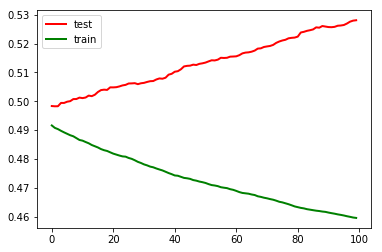

RF log-loss: value=6.16530558204 n_estimators=2
---
learning_rate: 0.7
GB min log-loss: value=0.497809268237 iter=4


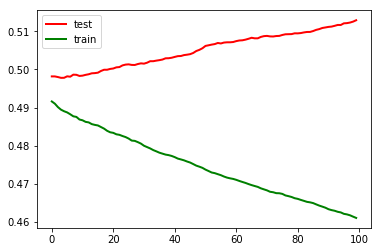

RF log-loss: value=3.61222047775 n_estimators=4
---
learning_rate: 0.5
GB min log-loss: value=0.497729019891 iter=6


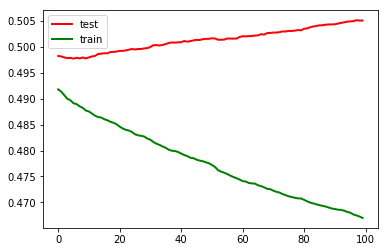

RF log-loss: value=2.65750666744 n_estimators=6
---
learning_rate: 0.4
GB min log-loss: value=0.497342325581 iter=15


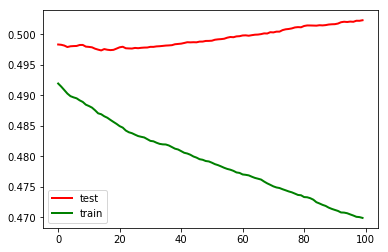

RF log-loss: value=1.2935012926 n_estimators=15
---
learning_rate: 0.3
GB min log-loss: value=0.497432401342 iter=24


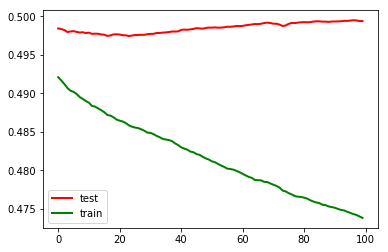

RF log-loss: value=0.891384626132 n_estimators=24
---
learning_rate: 0.2
GB min log-loss: value=0.497369031341 iter=33


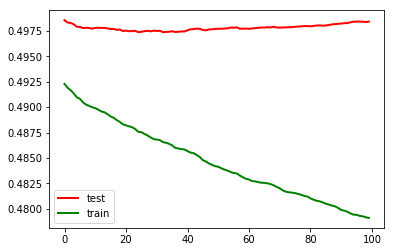

RF log-loss: value=0.752918849364 n_estimators=33
---
learning_rate: 0.1
GB min log-loss: value=0.497157426807 iter=75


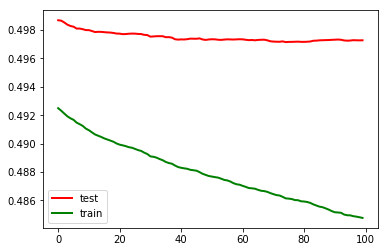

RF log-loss: value=0.590127221375 n_estimators=75
---
RF log-loss: value=0.54679146323 n_estimators=300
---
Winner log-loss: value=0.497157426807 n_estimators=75
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=75, presort='auto', random_state=241,
              subsample=1.0, verbose=False, warm_start=False)


In [505]:
print 'Fitting classifier for active ...'
selector_active = [c for c in columns if c != 'smoke' and c != 'alco' and c != 'active' and c != 'cardio']
classifier_active = get_classifier(data_train.ix[:,selector_active], data_train.ix[:,'active'])

In [506]:
active_none = data_test.active == 'None'
if len(np.nonzero(active_none)[0]) > 0:
    print 'Predicting active ...'
    pred = classifier_active.predict_proba(data_test.ix[active_none,selector_active])[:,1]
    data_test.loc[active_none,'active'] = pred    
    print pred
data_test.head(10)

Predicting active ...
[ 0.79924195  0.8176249   0.79129969 ...,  0.8150123   0.79368501
  0.79924114]


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
id,,,,,,,,,,,,
5,18888,1,154,85.0,130.0,80.0,1,1,0,0,1,35.840783
6,19042,2,170,69.0,130.0,90.0,1,1,None,0,1,23.875433
7,20432,1,160,70.0,120.0,75.0,1,1,0,0,0,27.343750
10,18133,2,185,94.0,130.0,90.0,1,1,None,0,1,27.465303
11,16093,2,170,76.0,120.0,80.0,1,1,0,0,1,26.297578
17,16712,1,160,68.0,120.0,80.0,1,1,0,0,0,26.562500
19,15873,2,170,68.0,120.0,80.0,1,1,0,None,0.799242,23.529412
20,20424,1,164,60.0,120.0,80.0,1,1,0,0,0,22.308150
22,20262,1,170,68.0,110.0,70.0,1,1,0,0,1,23.529412


Fitting classifier for smoke ...
---
learning_rate: 1.0


/Users/d065441/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


GB min log-loss: value=0.24031783518 iter=4


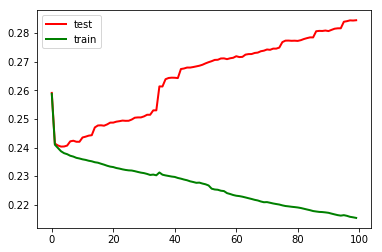

RF log-loss: value=1.56110202677 n_estimators=4
---
learning_rate: 0.7
GB min log-loss: value=0.239870742575 iter=5


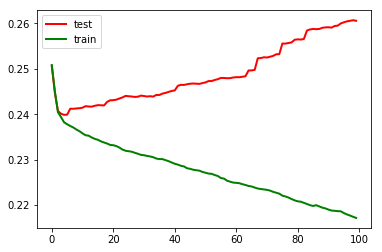

RF log-loss: value=1.32364673213 n_estimators=5
---
learning_rate: 0.5
GB min log-loss: value=0.239211157789 iter=6


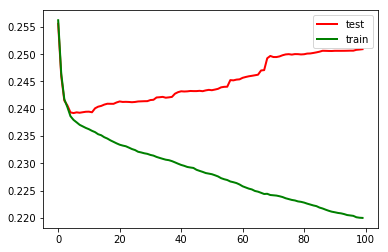

RF log-loss: value=1.16914786742 n_estimators=6
---
learning_rate: 0.4
GB min log-loss: value=0.238526407685 iter=8


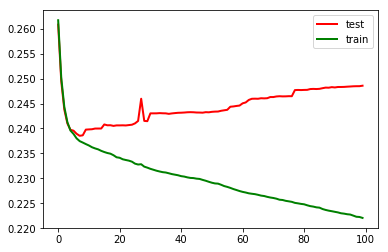

RF log-loss: value=1.00290220744 n_estimators=8
---
learning_rate: 0.3
GB min log-loss: value=0.238339431596 iter=14


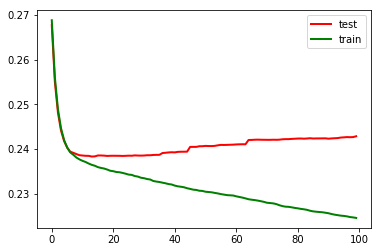

RF log-loss: value=0.718728077046 n_estimators=14
---
learning_rate: 0.2
GB min log-loss: value=0.238489740141 iter=26


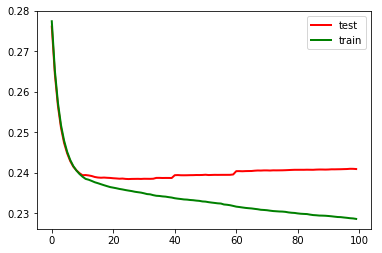

RF log-loss: value=0.535977682865 n_estimators=26
---
learning_rate: 0.1
GB min log-loss: value=0.238063986019 iter=73


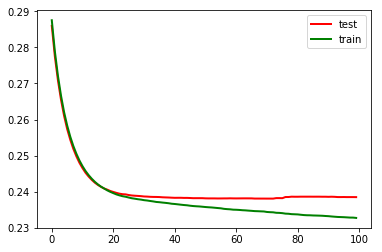

RF log-loss: value=0.409864716161 n_estimators=73
---
RF log-loss: value=0.316668352215 n_estimators=300
---
Winner log-loss: value=0.238063986019 n_estimators=73
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=73, presort='auto', random_state=241,
              subsample=1.0, verbose=False, warm_start=False)


In [507]:
print 'Fitting classifier for smoke ...'
selector_smoke = [c for c in columns if c != 'smoke' and c != 'alco' and c != 'cardio']
classifier_smoke = get_classifier(data_train.ix[:,selector_smoke], data_train.ix[:,'smoke'])

In [508]:
smoke_none = data_test.smoke == 'None'
if len(np.nonzero(smoke_none)[0]) > 0:
    print 'Predicting smoke ...'
    pred = classifier_smoke.predict_proba(data_test.ix[smoke_none,selector_smoke])[:,1]
    data_test.loc[smoke_none,'smoke'] = pred    
    print pred
data_test.head(10)

Predicting smoke ...
[ 0.22199316  0.27377897  0.01508155 ...,  0.02983749  0.49991361
  0.28720923]


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
id,,,,,,,,,,,,
5,18888,1,154,85.0,130.0,80.0,1,1,0,0,1,35.840783
6,19042,2,170,69.0,130.0,90.0,1,1,0.221993,0,1,23.875433
7,20432,1,160,70.0,120.0,75.0,1,1,0,0,0,27.343750
10,18133,2,185,94.0,130.0,90.0,1,1,0.273779,0,1,27.465303
11,16093,2,170,76.0,120.0,80.0,1,1,0,0,1,26.297578
17,16712,1,160,68.0,120.0,80.0,1,1,0,0,0,26.562500
19,15873,2,170,68.0,120.0,80.0,1,1,0,None,0.799242,23.529412
20,20424,1,164,60.0,120.0,80.0,1,1,0,0,0,22.308150
22,20262,1,170,68.0,110.0,70.0,1,1,0,0,1,23.529412


Fitting classifier for alco ...
---
learning_rate: 1.0


/Users/d065441/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


GB min log-loss: value=0.22935457781 iter=2


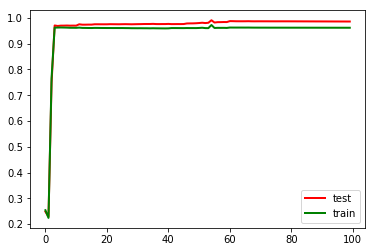

RF log-loss: value=1.66392882455 n_estimators=2
---
learning_rate: 0.7
GB min log-loss: value=0.173852394928 iter=3


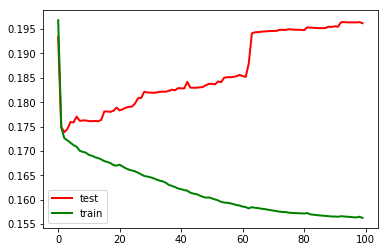

RF log-loss: value=1.3150266885 n_estimators=3
---
learning_rate: 0.5
GB min log-loss: value=0.172236203293 iter=4


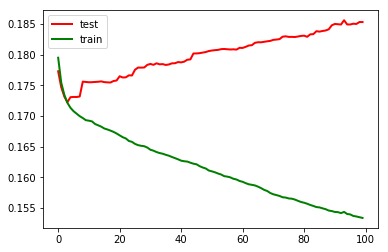

RF log-loss: value=1.14293086844 n_estimators=4
---
learning_rate: 0.4
GB min log-loss: value=0.172781387989 iter=7


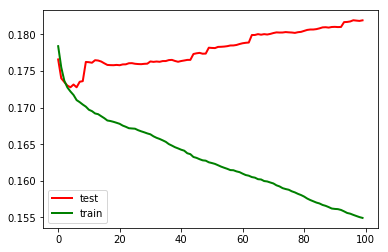

RF log-loss: value=0.898161140988 n_estimators=7
---
learning_rate: 0.3
GB min log-loss: value=0.171416274777 iter=12


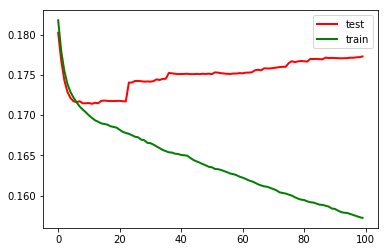

RF log-loss: value=0.747186455541 n_estimators=12
---
learning_rate: 0.2
GB min log-loss: value=0.170686776725 iter=13


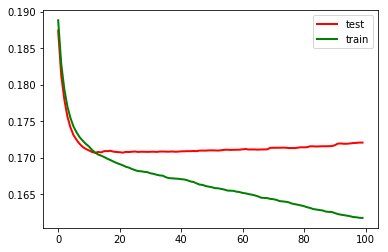

RF log-loss: value=0.736859057727 n_estimators=13
---
learning_rate: 0.1
GB min log-loss: value=0.170472348467 iter=52


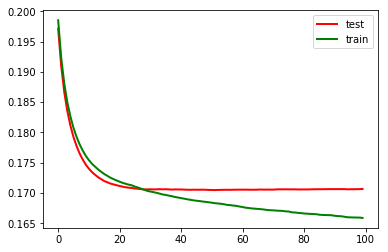

RF log-loss: value=0.461100591294 n_estimators=52
---
RF log-loss: value=0.250903575699 n_estimators=300
---
Winner log-loss: value=0.170472348467 n_estimators=52
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=52, presort='auto', random_state=241,
              subsample=1.0, verbose=False, warm_start=False)


In [509]:
print 'Fitting classifier for alco ...'
selector_alco = [c for c in columns if c != 'alco' and c != 'cardio']
classifier_alco = get_classifier(data_train.ix[:,selector_alco], data_train.ix[:,'alco'])

In [510]:
alco_none = data_test.alco == 'None'
if len(np.nonzero(alco_none)[0]) > 0:
    print 'Predicting alco ...'
    pred = classifier_alco.predict_proba(data_test.ix[alco_none,selector_alco])[:,1]
    data_test.loc[alco_none,'alco'] = pred    
    print pred
data_test.head(10)

Predicting alco ...
[ 0.03596553  0.01347856  0.04059399 ...,  0.02423587  0.03292284
  0.02349076]


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
id,,,,,,,,,,,,
5,18888,1,154,85.0,130.0,80.0,1,1,0,0,1,35.840783
6,19042,2,170,69.0,130.0,90.0,1,1,0.221993,0,1,23.875433
7,20432,1,160,70.0,120.0,75.0,1,1,0,0,0,27.343750
10,18133,2,185,94.0,130.0,90.0,1,1,0.273779,0,1,27.465303
11,16093,2,170,76.0,120.0,80.0,1,1,0,0,1,26.297578
17,16712,1,160,68.0,120.0,80.0,1,1,0,0,0,26.562500
19,15873,2,170,68.0,120.0,80.0,1,1,0,0.0359655,0.799242,23.529412
20,20424,1,164,60.0,120.0,80.0,1,1,0,0,0,22.308150
22,20262,1,170,68.0,110.0,70.0,1,1,0,0,1,23.529412


In [519]:
data_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000
mean,19468.928942,1.349499,164.399783,74.197614,127.067729,81.594176,1.366942,1.226542,0.088115,0.053758,0.803754,0.499807,27.495683
std,2467.231207,0.476815,7.984686,14.347557,17.056070,9.781873,0.680297,0.572369,0.283464,0.225541,0.397159,0.500004,5.284256
min,10798.000000,1.000000,91.000000,28.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.189591
max,23713.000000,2.000000,250.000000,200.000000,240.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,70.000000


In [520]:
data_test.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,19455.528400,1.353733,164.322267,74.120615,127.108429,81.629317,1.368033,1.222700,27.468667
std,2477.840922,0.478136,8.213740,14.341540,16.994314,9.695911,0.679166,0.566494,5.216099
min,8865.000000,1.000000,50.000000,10.000000,60.000000,30.000000,1.000000,1.000000,10.569428
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,23.875115
50%,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,26.346494
75%,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,30.116213
max,23705.000000,2.000000,198.000000,183.000000,240.000000,172.000000,3.000000,3.000000,70.000000


In [521]:
col_sel = [c for c in columns if c != 'cardio']
X_train = data_train[col_sel]
y_train = data_train['cardio']
X_test = data_test

Fitting classifier for cardio ...
---
learning_rate: 1.0
GB min log-loss: value=0.542940090658 iter=8


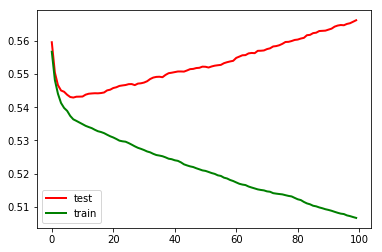

RF log-loss: value=1.71623236269 n_estimators=8
---
learning_rate: 0.7
GB min log-loss: value=0.540956926711 iter=16


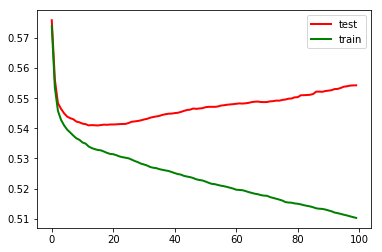

RF log-loss: value=0.969678721643 n_estimators=16
---
learning_rate: 0.5
GB min log-loss: value=0.54087813428 iter=27


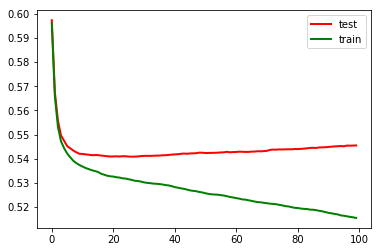

RF log-loss: value=0.749513634021 n_estimators=27
---
learning_rate: 0.4
GB min log-loss: value=0.540370488544 iter=24


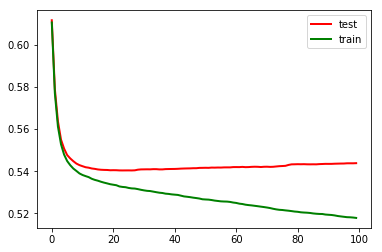

RF log-loss: value=0.780879674778 n_estimators=24
---
learning_rate: 0.3
GB min log-loss: value=0.540084835781 iter=44


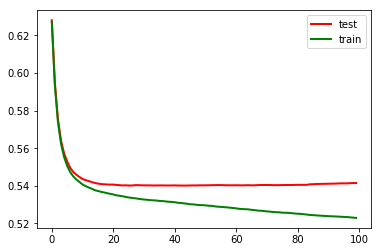

RF log-loss: value=0.649157750561 n_estimators=44
---
learning_rate: 0.2
GB min log-loss: value=0.539124975977 iter=68


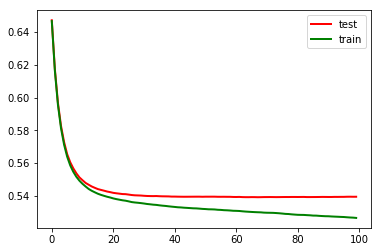

RF log-loss: value=0.616546796448 n_estimators=68
---
learning_rate: 0.1
GB min log-loss: value=0.539229076193 iter=99


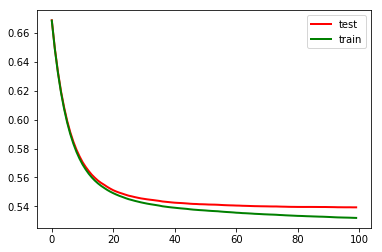

RF log-loss: value=0.594714631714 n_estimators=99
---
RF log-loss: value=0.578589532853 n_estimators=300
---
Winner log-loss: value=0.539124975977 n_estimators=68
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=68, presort='auto', random_state=241,
              subsample=1.0, verbose=False, warm_start=False)


In [522]:
print 'Fitting classifier for cardio ...'
classifier_cardio = get_classifier(X_train, y_train)

In [523]:
classifier_cardio.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=68, presort='auto', random_state=241,
              subsample=1.0, verbose=False, warm_start=False)

In [524]:
pred = classifier_cardio.predict_proba(X_test)[:,1]
pred.tofile('data/test_pred.csv', '\n')